<a href="https://colab.research.google.com/github/doridgo/airbnb-distrito-do-porto/blob/main/An%C3%A1lise_do_Airbnb_Distrito_do_Porto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise do Airbnb - Distrito do Porto**

O Porto é um distrito português muito conhecido mundialmente pelo seu aspecto turístico, com bonitas paisagens e muitas atrações históricas e culturais. Este distrito acaba atraindo muitos brasileiros, tanto enquanto turistas como também aspirantes a cidadãos portugueses! 

Isso acontece por se tratar de um país que oferece uma facilidade maior na imigração de brasileiros em relação aos demais países do velho continente. Além disso, a língua acaba também sendo mais um fator positivo na escolha do destino.

Dito isto, vemos a necessidade de explorar os dados relacionados a hospedagem nesse terreno fértil para brasileiros - que é o Distrito do Porto!

Para tanto, utilizaremos como fonte dos dados o Airbnb, que é considerado como sendo a **maior empresa hoteleira da atualidade**, mesmo sem possuir nenhum hotel!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Porto, Portugal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/norte/porto/2021-12-08/visualisations/listings.csv")



## Análise dos Dados


**Dicionário das variáveis**

* id - Número identificador da listagem
* name - Nome da listagem 
* host_id - Número identificador do anfitrião
* neighbourhood_group - Agrupamento de vizinhança atribuído à listagem
* neighbourhood - Vizinhança onde está localizada a listagem
* latitude - Latitude da listagem
* room_type - Tipo de acomodação, entre casa inteira e quarto da listagem
* price - Preço em dólar da diária da listagem
* minimum_nights - Requisito mínimo de noites para aluguel da listagem
* number_of_reviews - Quórum de avaliações da listagem
* last_review - Avaliação mais recente da listagem
* reviews_per_month - Média de avaliações mensais da listagem
* calculated_host_listings_count - Número total de listagens do anfitrião
* availability_365 - Disponibilidade do aluguel da listagem
* number_of_reviews_ltm - Número de avaliações nos últimos doze meses
* license - Número da licença/registro

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,75,5,17,2018-09-28,0.16,1,113,0,29049/AL
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.18,3,0,0,7563/AL
2,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.10,3,0,0,7563/AL
3,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,20,2,148,2021-11-23,1.14,7,310,12,6995/AL
4,87873,Oporto Apartment Triplex,480980,Paula,PORTO,Bonfim,41.15786,-8.60427,Entire home/apt,69,3,192,2021-11-27,1.65,3,347,9,634/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:{}".format(df.shape[0]))
print("Variáveis:{}".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:10748
Variáveis:18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.149795
last_review                       0.149795
license                           0.082248
host_name                         0.000372
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

In [7]:
df_limpo = df.dropna(subset=['last_review', 'license', 'host_name'])

print("Antes:{}".format(df.shape))
print("Depois:{}".format(df_limpo.shape))

Antes:(10748, 18)
Depois:(8401, 18)


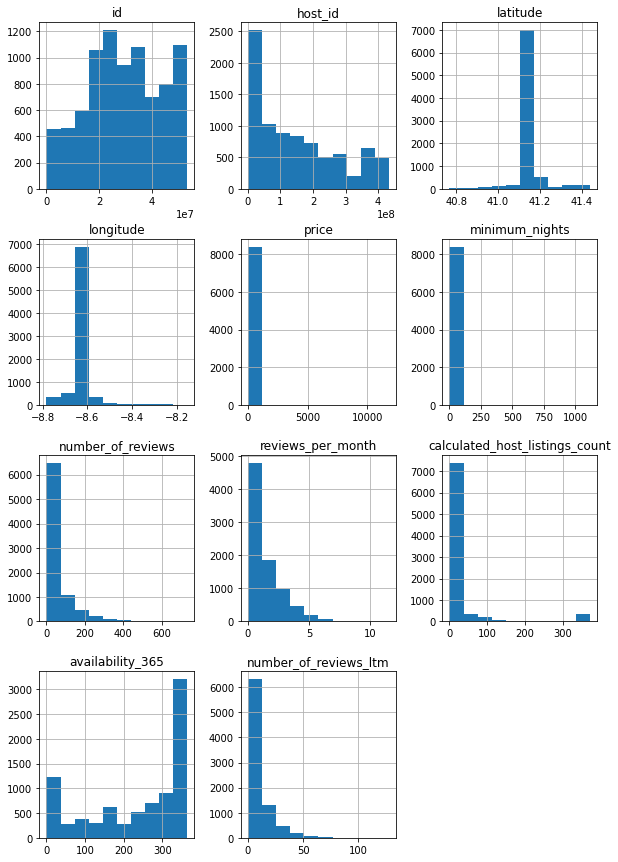

In [8]:
# plotar o histograma das variáveis numéricas
df_limpo.hist(bins=10, figsize=(10,15));

### **Buscando e tratando outliers**
De acordo com os histogramas acima, é possível identificar a possibilidade de influência de outliers nas colunas 'price', 'minimum_nights', 'number_of_reviews_ltm'.

Portanto, vamos investigar mais a fundo e tratar os outliers, se necessário.

Para a coluna `price`, estabeleci o parâmetro máximo como sendo ***300***, por acreditar que diárias com preço acima disso estariam muito acima do padrão buscado pelos usuários do Airbnb de acordo com os dados descritos abaixo através do describe..

Para a coluna `minimum_nights`, estabeleci o parâmetro máximo como sendo ***30***, por acreditar que poucas pessoas estariam dispostas a alugar por esse tempo todo, de acordo com os dados descritos abaixo através do describe.

Para a coluna `number_of_reviews`, estabeleci o parâmetro máximo como sendo ***400***, por acreditar que poucas listagens haveriam tantas avaliações, de acordo com os dados descritos abaixo através do describe.

In [9]:
df_limpo[['price', 'minimum_nights', 'number_of_reviews']].describe()

,price,minimum_nights,number_of_reviews
count,8401.000000,8401.000000,8401.000000
mean,83.695036,3.010237,52.536722
std,310.129750,17.806423,76.279719
min,9.000000,1.000000,1.000000
25%,40.000000,1.000000,5.000000
50%,57.000000,2.000000,22.000000
75%,80.000000,2.000000,67.000000
max,11799.000000,1123.000000,733.000000


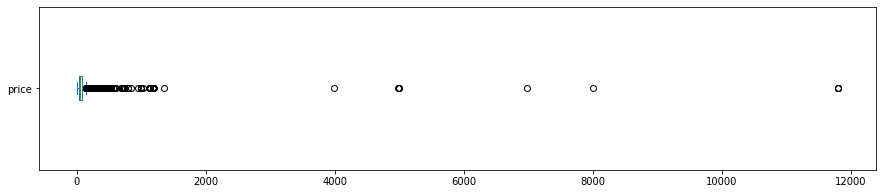

Price - Acima de 300
129entradas
1.5355%


In [10]:
#entendendo melhor a influência dos outliers na coluna price
df_limpo.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print("Price - Acima de 300")
print("{}entradas".format(len(df_limpo[df_limpo.price > 300])))
print("{:.4f}%".format((len(df_limpo[df_limpo.price > 300]) / df_limpo.shape[0]*100)))

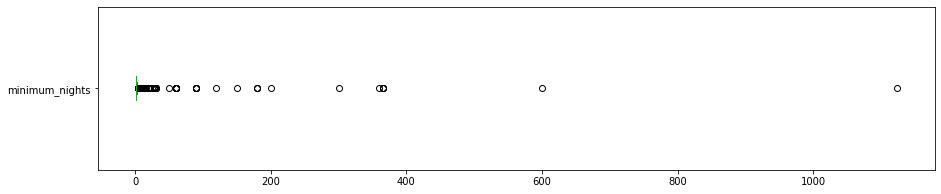

Minimum_nights - Acima de 30
31entradas
0.3690%


In [11]:
#entendendo melhor a influência dos outliers na coluna minimum_nights
df_limpo.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print("Minimum_nights - Acima de 30")
print("{}entradas".format(len(df_limpo[df_limpo.minimum_nights > 30])))
print("{:.4f}%".format((len(df_limpo[df_limpo.minimum_nights > 30]) / df_limpo.shape[0]*100)))

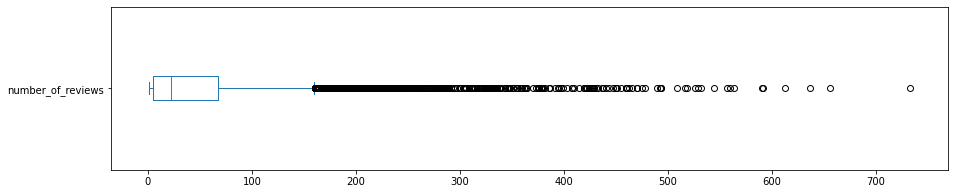

number_of_reviews - Acima de 400
58entradas
0.6904%


In [12]:
#entendendo melhor a influência dos outliers na coluna number_of_reviews
df_limpo.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print("number_of_reviews - Acima de 400")
print("{}entradas".format(len(df_limpo[df_limpo.number_of_reviews > 400])))
print("{:.4f}%".format((len(df_limpo[df_limpo.number_of_reviews > 400]) / df_limpo.shape[0]*100)))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d6cc3fa90>,
      dtype=object)

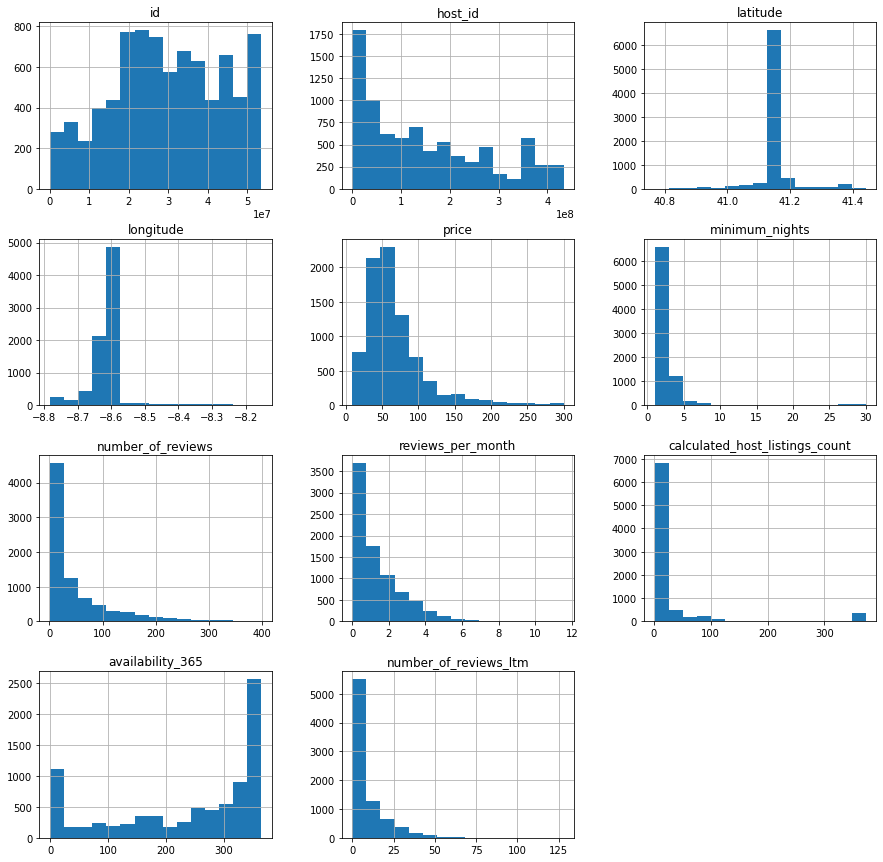

In [13]:
#tratando os outliers

df_clean = df_limpo.copy()
df_clean.drop(df_clean[df_clean.price > 300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 400].index, axis=0, inplace=True)

df_clean.hist(bins=15, figsize=(15,15))


### **Q4. Qual a média dos preços de aluguel?**

In [14]:
# ver a média da coluna `price`
df_clean["price"].mean()

66.55345143555284

### **Q4. Qual a correlação existente entre as variáveis**

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.022947,-0.116390,-0.115898,0.075292
minimum_nights,-0.022947,1.000000,-0.023949,-0.065778,-0.099313
number_of_reviews,-0.116390,-0.023949,1.000000,0.057299,0.005483
calculated_host_listings_count,-0.115898,-0.065778,0.057299,1.000000,0.115722
availability_365,0.075292,-0.099313,0.005483,0.115722,1.000000


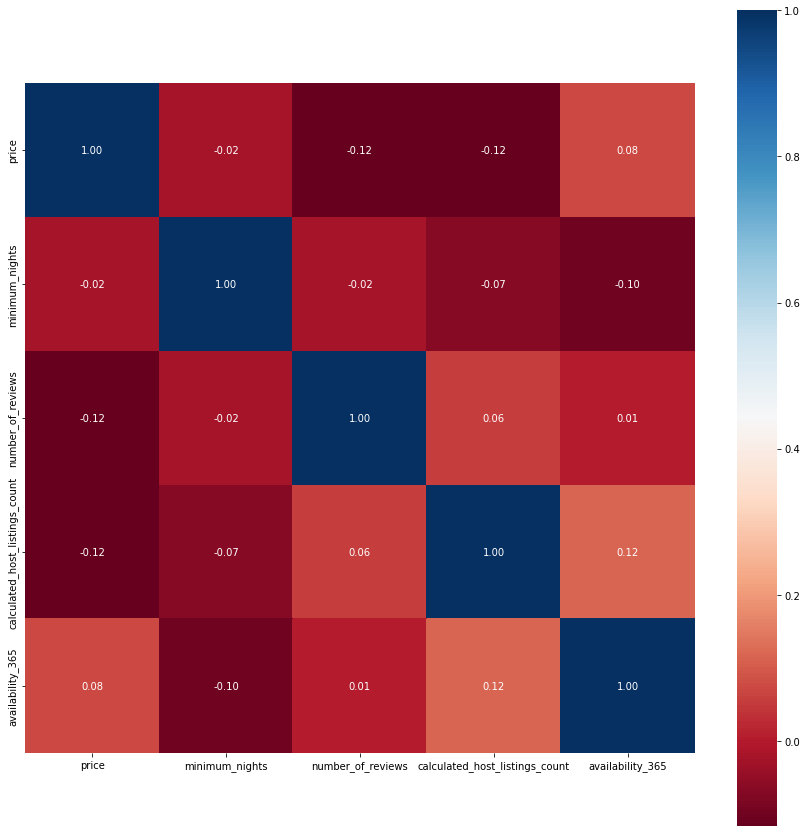

In [16]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Não há correlação entre os dados.**
Os dados em análise não apresentam correlação entre si. Porém, eu queria explorar a influência da localidade no preço, através da média de preços por localidade e entender a variação média entre os agrupamentos de bairros, mas não consegui chegar a uma conclusão em ***como executar isso aqui***.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6899
Private room       1134
Hotel room           98
Shared room          54
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.room_type.shape

Entire home/apt    0.842883
Private room       0.138546
Hotel room         0.011973
Shared room        0.006597
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



**<h1>Breve Contexto<h1/>**

Portugal é um país dividido em **distritos** que são subdivididos **municípios**. O distrito do Porto, alvo da nossa análise, possui muitos municípios inseridos, e estão representadas neste dataframe sob a nomenclatura de `neighbourhood_group`. Portanto, a análise será feita com base nos municípios, e não nos bairros especificamente.


In [32]:
# ver preços por municípios, na média
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:20]

neighbourhood_group
VALE DE CAMBRA          114.266667
TROFA                   109.818182
SANTO TIRSO             106.333333
AROUCA                  103.782609
GONDOMAR                 96.791045
PAREDES                  88.482759
OLIVEIRA DE AZEMÉIS      84.800000
VILA DO CONDE            83.402174
ESPINHO                  77.223529
PÓVOA DE VARZIM          72.343023
VALONGO                  71.523810
SANTA MARIA DA FEIRA     70.911765
VILA NOVA DE GAIA        67.498331
PORTO                    64.461538
MATOSINHOS               62.981595
MAIA                     60.900000
SÃO JOÃO DA MADEIRA      49.307692
Name: price, dtype: float64

Podemos identificar que, pela média, o agrupamento de bairros mais caro é **VALE DE CAMBRA**, seguido por **TROFA, SANTO TIRSO e AROUCA**. Estes municípios apresentam a média 63% maior que a média da cidade.

OBS.: A princípio, utilizei a coluna `neighbourhood` para este tipo de análise, mas identifiquei que o número de entradas estaria melhor distribuído com a coluna `neighbourhood_group`. Desenhei um breve contexto para a construção da análise no tópico anterior. Dessa forma, o objetivo é evitar amostras irrelevantes que elevariam a média de cada localidade.

In [47]:
df_clean.neighbourhood_group.value_counts()

PORTO                   6149
VILA NOVA DE GAIA        899
MATOSINHOS               326
VILA DO CONDE            184
PÓVOA DE VARZIM          172
ESPINHO                   85
AROUCA                    69
GONDOMAR                  67
MAIA                      50
SANTA MARIA DA FEIRA      34
VALE DE CAMBRA            30
PAREDES                   29
OLIVEIRA DE AZEMÉIS       25
SANTO TIRSO               21
VALONGO                   21
SÃO JOÃO DA MADEIRA       13
TROFA                     11
Name: neighbourhood_group, dtype: int64

No entanto, podemos ver que a discrepância ainda é muito grande entre os dados, com a grande maioria se concentrando na Cidade do Porto. Portanto, voltemos a nossa análise para os bairros, com a variável `neighbourhood`. 

Por isso, vou criar um filtro para exibir e analisar apenas dados da variável `neighbourhood` que possuem um número de entradas superior a 20 e obter uma análise mais precisa.

In [74]:
# ver os preços médios por bairro
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Paramos                        295.0
Touguinha e Touguinhó          215.0
Nogueira e Silva Escura        200.0
Balazar                        200.0
Covelas                        200.0
                               ...  
Baguim do Monte (Rio Tinto)     25.0
Canelas                         21.0
Argoncilhe                      19.0
Gandra                          16.0
Sanguedo                        13.0
Name: price, Length: 138, dtype: float64

In [82]:
# criando um filtro para excluir os bairros com amostra baixa e calculando a média deles
df1 = df_clean[df_clean['neighbourhood'].map(df_clean['neighbourhood'].value_counts()) > 20]
df1.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Gondomar (São Cosme), Valbom e Jovim                    105.909091
Vila Chã                                                 95.392857
Arouca e Burgo                                           91.181818
Aldoar, Foz do Douro e Nevogilde                         84.698529
Arcozelo                                                 81.641509
Gulpilhares e Valadares                                  79.025000
Espinho                                                  78.478261
AVer-o-Mar, Amorim e Terroso                             76.914286
Canidelo                                                 74.642105
Madalena                                                 72.038462
Vila do Conde                                            71.060976
Lordelo do Ouro e Massarelos                             69.676364
Perafita, Lavra e Santa Cruz do Bispo                    68.289474
Póvoa de Varzim, Beiriz e Argivai                        67.966942
Santa Marinha e São Pedro da Afurada            

In [83]:
# checando para ver quantas entradas cada um possui

df1.neighbourhood.value_counts()

Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória    4377
Bonfim                                                   848
Santa Marinha e São Pedro da Afurada                     441
Lordelo do Ouro e Massarelos                             275
Paranhos                                                 274
Matosinhos e Leça da Palmeira                            216
Mafamude e Vilar do Paraíso                              163
Aldoar, Foz do Douro e Nevogilde                         136
Campanhã                                                 135
Póvoa de Varzim, Beiriz e Argivai                        121
Ramalde                                                  104
Canidelo                                                  95
Vila do Conde                                             82
Espinho                                                   69
São Mamede de Infesta e Senhora da Hora                   61
Arcozelo                                                  53
Gulpilhares e Valadares 

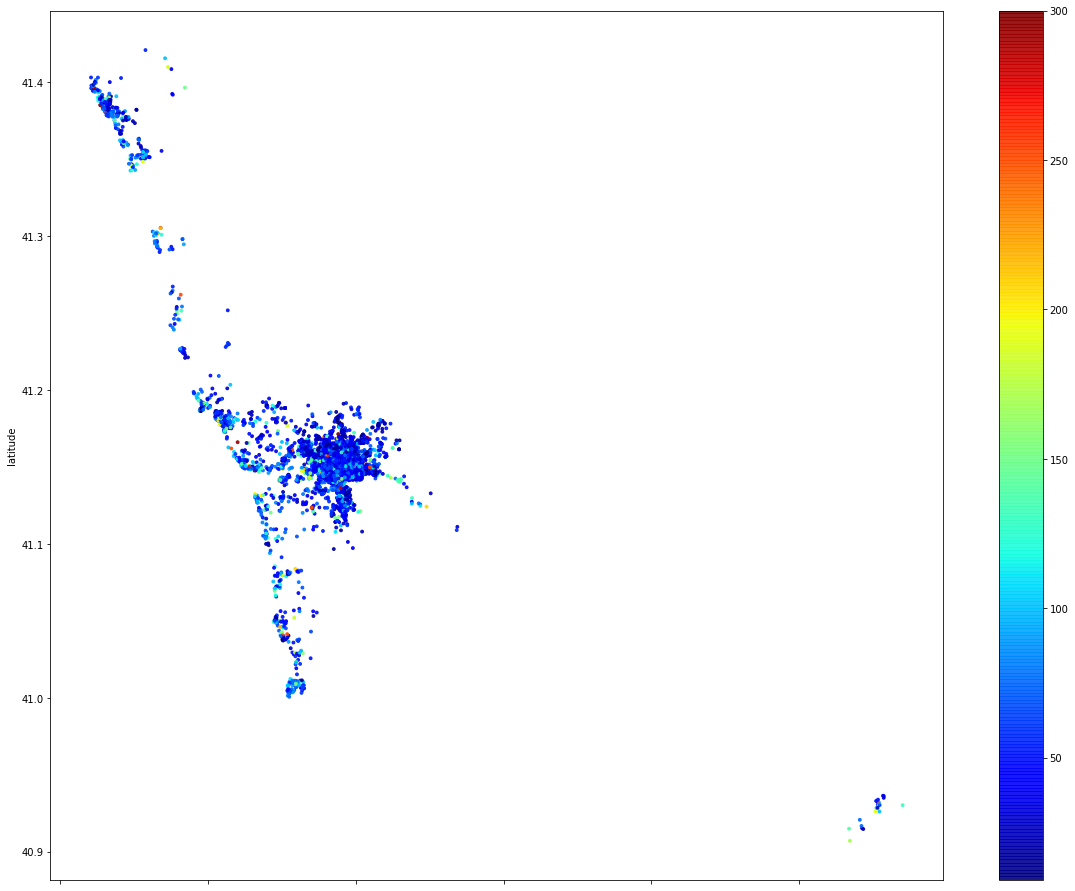

In [92]:
# plotar os imóveis pela latitude-longitude
df1.plot(kind="scatter", x='longitude', y='latitude', alpha=0.9, c=df1['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(20,16));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [94]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.261087354917532

## Conclusões

Com essa análise, podemos ver que a maior concentração de imóveis listados está na **Cidade do Porto**, distribuídos principalmente na faixa litorânea.

Não foi possível identificar uma correlação entre os dados apresentados neste dataset.

Os

*OBS 1.: Tentei plotar o gráfico em cima de uma imagem com o mapa do Porto, mas não consegui. Quando avançar para o próximo módulo tentarei novamente.*

*OBS 2.: Optei por deixar ao longo da análise a minha linha de raciocínio, incluindo as escolhas e suas justificativas.*